# Exploring the Quasar Absorption features

Possibly using stack plot from `linetools`

In [1]:
from pyigm.cgm import cgmsurvey
from linetools.spectra.io import readspec
import linetools

In [2]:
def get_qsoname_from_string(filename):
    """ Find the QSO name (JXXXX+XXXX) in a string, usually the file path.

    Args:
        filename (str): path with qso file

    Returns:
        qsoname (str): qso name (JXXXX+XXXX)


    """
    #if "J0226+001" not in filename:
    #    qso_name = filename[filename.find('J'):filename.find('J') + 10]
    #else:
    #    qso_name = filename[filename.find('J'):filename.find('J') + 9]
    qso_name = filename[filename.find('J'):filename.find('J') + 10]

    return qso_name

def attach_spectra(cgm_survey, data_path='../data/spectra/'):
    for name in cgm_survey._data['Name']:
        # get the base name from the longer form associated with cgm abs systems
        qso_name = get_qsoname_from_string(name)
        # point to the correct path
        specfile = data_path+qso_name+'_nbin3_norm.fits'
        # crate an Xspec1D object from the spec
        spec = readspec(specfile)
        # attach the spec object to each absorption line in each component for each galaxy
        cgm_abs_sys = cgm_survey.get_cgmsys(name)
        for comp in cgm_abs_sys._components:
            for absline in comp._abslines:
                absline.analy['spec'] = spec

### Load in a CGMSurvey object containing the CGM$^2$ data

In [3]:
survey_file = '../data/cgmsquared_cgmsurvey_aodm_v4.json'

In [4]:
cgm_survey = cgmsurvey.CGMAbsSurvey.from_json(survey_file, chk_z=False, verbose=False, build_sys=True)

read_sets: Using set file -- 
  /Users/mwilde/python/linetools/linetools/lists/sets/llist_v1.2.ascii
Loading abundances from Asplund2009
Abundances are relative by number on a logarithmic scale with H=12


### This survey object contains 953 CGM systems

In [5]:
cgm_survey

<CGM_Survey:  nsys=953, ref=>

### In order to plot the absorption lines, we need to provide a spectrum. We can attach a spectrum by specifying a file and then turning it into a `XSpectrum1D` object. 

We need the path the spectrum.

In [6]:
attach_spectra(cgm_survey, data_path='../data/spectra/')    

### The `CGMSurvey` is made up of galaxy-absorber pairs based on our matching criteria. We can access them in a variety of ways. An easy way is for us to get the `CGMAbsSys` for a galaxy we are interested in. 

In [7]:
cgm_abs_sys = cgm_survey.get_cgmsys('J1233-0031_247_12')

In [8]:
cgm_abs_sys

<CGMAbsSys: J1233-0031_247_12 Galaxy RA/DEC=12:33:03.1091-00:31:38.748, zgal=0.318743, rho=56.8678 kpc>

### cgm_abs objects are the galaxy/absorber pairs

They are python objects with methods and attributes. Each one can access both the absorber or the galay via
* `cgm_abs_sys.igm_sys`
* `cgm_abs_sys.galaxy`

### In order to study the absorbers we need to access the igm_sys. These are made up of `components`. Each component is made up of `AbsLines`

### Note that these are python objects with methods and attributes

Here is an igm systems which contains info on the absorbers

In [9]:
cgm_abs_sys.igm_sys

<IGMSystem: IGMSystem 12:33:03.8415 -00:31:34.1821, zabs=0.318743, Z/H=0, NHI=15.7214>

### For this particular absorber-galaxy pair, we have 9 components

In [10]:
cgm_abs_sys.igm_sys._components

[<AbsComponent: 12:33:03.84 -00:31:34.176, Name=HI_z0.31818, Zion=(1,1), Ej=0 1 / cm, z=0.318743, vlim=-166.804 km / s,-89.4211 km / s, logN=14.2625, sig_logN=[0.04624026 0.04624026], flag_N=1>,
 <AbsComponent: 12:33:03.84 -00:31:34.176, Name=OVI_z0.31820, Zion=(8,6), Ej=0 1 / cm, z=0.318743, vlim=-155.227 km / s,-91.6908 km / s, logN=14.0745, sig_logN=[0.05242471 0.05242471], flag_N=1>,
 <AbsComponent: 12:33:03.84 -00:31:34.176, Name=CIII_z0.31820, Zion=(6,3), Ej=0 1 / cm, z=0.318743, vlim=-150.513 km / s,-95.9372 km / s, logN=13.2458, sig_logN=[0.07340846 0.07340846], flag_N=1>,
 <AbsComponent: 12:33:03.84 -00:31:34.176, Name=HI_z0.31849, Zion=(1,1), Ej=0 1 / cm, z=0.318743, vlim=-88.3216 km / s,-26.415 km / s, logN=14.9604, sig_logN=[0.04497997 0.04497997], flag_N=1>,
 <AbsComponent: 12:33:03.84 -00:31:34.176, Name=SVI_z0.31863, Zion=(16,6), Ej=0 1 / cm, z=0.318743, vlim=-55.1322 km / s,3.51617 km / s, logN=13.0491, sig_logN=[0.11631044 0.11631044], flag_N=1>,
 <AbsComponent: 12:33:

its also ok to access the components directly from the `CGMAbsSys`

In [11]:
cgm_abs_sys._components

[<AbsComponent: 12:33:03.84 -00:31:34.176, Name=HI_z0.31818, Zion=(1,1), Ej=0 1 / cm, z=0.318743, vlim=-166.804 km / s,-89.4211 km / s, logN=14.2625, sig_logN=[0.04624026 0.04624026], flag_N=1>,
 <AbsComponent: 12:33:03.84 -00:31:34.176, Name=OVI_z0.31820, Zion=(8,6), Ej=0 1 / cm, z=0.318743, vlim=-155.227 km / s,-91.6908 km / s, logN=14.0745, sig_logN=[0.05242471 0.05242471], flag_N=1>,
 <AbsComponent: 12:33:03.84 -00:31:34.176, Name=CIII_z0.31820, Zion=(6,3), Ej=0 1 / cm, z=0.318743, vlim=-150.513 km / s,-95.9372 km / s, logN=13.2458, sig_logN=[0.07340846 0.07340846], flag_N=1>,
 <AbsComponent: 12:33:03.84 -00:31:34.176, Name=HI_z0.31849, Zion=(1,1), Ej=0 1 / cm, z=0.318743, vlim=-88.3216 km / s,-26.415 km / s, logN=14.9604, sig_logN=[0.04497997 0.04497997], flag_N=1>,
 <AbsComponent: 12:33:03.84 -00:31:34.176, Name=SVI_z0.31863, Zion=(16,6), Ej=0 1 / cm, z=0.318743, vlim=-55.1322 km / s,3.51617 km / s, logN=13.0491, sig_logN=[0.11631044 0.11631044], flag_N=1>,
 <AbsComponent: 12:33:

### The second component has 2 OVI `AbsLine`s associated with it

In [12]:
cgm_abs_sys._components[1]._abslines

[<AbsLine: OVI 1031, z=0.3182 wrest=1031.9261 Angstrom, f=0.1325>,
 <AbsLine: OVI 1037, z=0.3182 wrest=1037.6167 Angstrom, f=0.0658>]

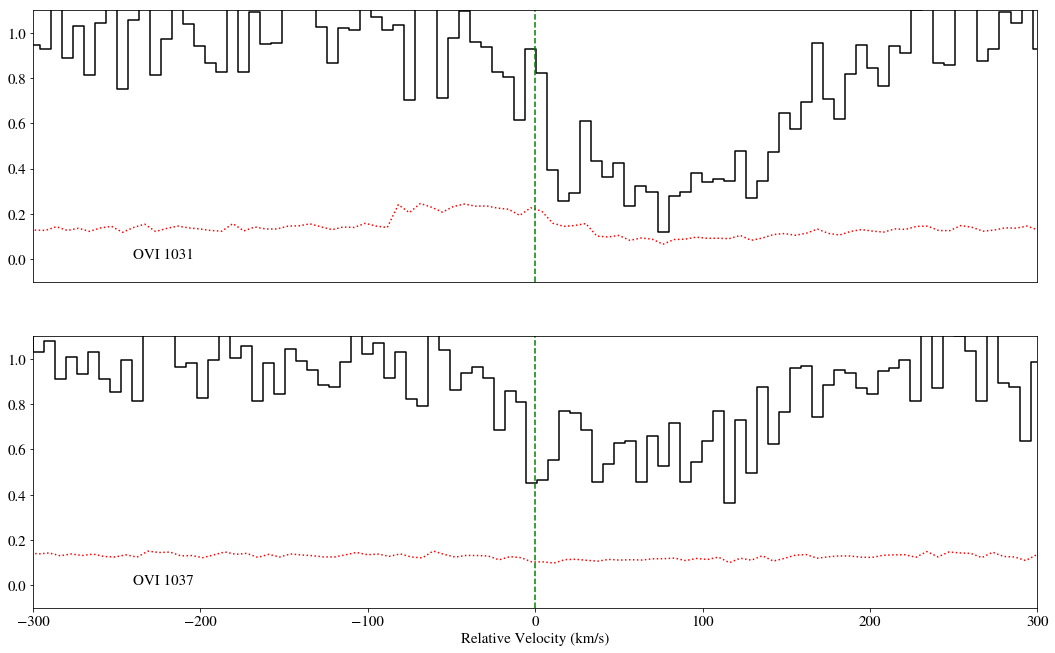

In [33]:
linetools.analysis.plots.stack_plot(cgm_abs_sys._components[1]._abslines)

### The first component has has 5 HI lines

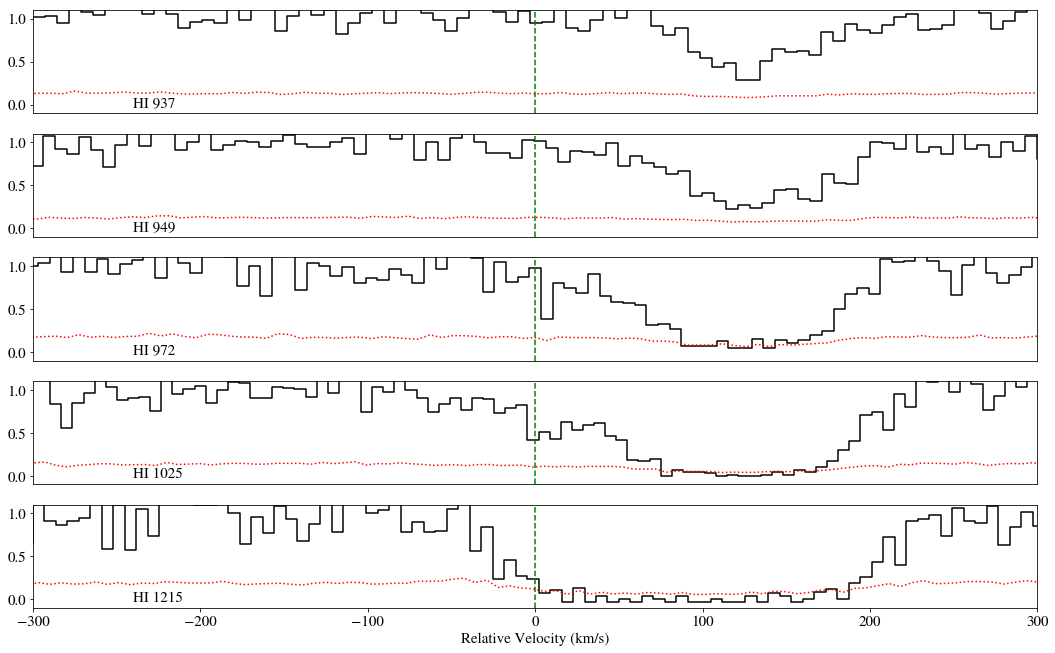

In [35]:
linetools.analysis.plots.stack_plot(cgm_abs_sys._components[0]._abslines)

### Here I am checking how the different `stack_plot` implementations work. 

* `cgm_abs_sys.stack_plot()` plots the same plot twice regardless if there are more components or abslines...

In [16]:
cgm_abs_list = cgm_survey.cgm_abs
cgm_abs = cgm_abs_list[0]
cgm_abs._components

[<AbsComponent: 02:26:14.4672 +00:15:29.772, Name=HI_z0.35043, Zion=(1,1), Ej=0 1 / cm, z=0.352715, vlim=-575.051 km / s,-439.709 km / s, logN=13.5786, sig_logN=[0.08639469 0.08639469], flag_N=1>,
 <AbsComponent: 02:26:14.4672 +00:15:29.772, Name=HI_z0.35293, Zion=(1,1), Ej=0 1 / cm, z=0.352715, vlim=-47.3484 km / s,144.529 km / s, logN=14.3901, sig_logN=[0.04454703 0.04454703], flag_N=1>,
 <AbsComponent: 02:26:14.4672 +00:15:29.772, Name=HI_z0.35355, Zion=(1,1), Ej=0 1 / cm, z=0.352715, vlim=106.809 km / s,262.709 km / s, logN=13.8658, sig_logN=[0.04954956 0.04954956], flag_N=1>]

In [17]:
cgm_abs._components[0]._abslines

[<AbsLine: HI 972, z=0.3504 wrest=972.5367 Angstrom, f=0.02901>,
 <AbsLine: HI 1025, z=0.3504 wrest=1025.7222 Angstrom, f=0.07914>,
 <AbsLine: HI 1215, z=0.3504 wrest=1215.6700 Angstrom, f=0.4164>]

In [18]:
cgm_abs.igm_sys._components[0]._abslines

[<AbsLine: HI 972, z=0.3504 wrest=972.5367 Angstrom, f=0.02901>,
 <AbsLine: HI 1025, z=0.3504 wrest=1025.7222 Angstrom, f=0.07914>,
 <AbsLine: HI 1215, z=0.3504 wrest=1215.6700 Angstrom, f=0.4164>]

Loading abundances from Asplund2009
Abundances are relative by number on a logarithmic scale with H=12


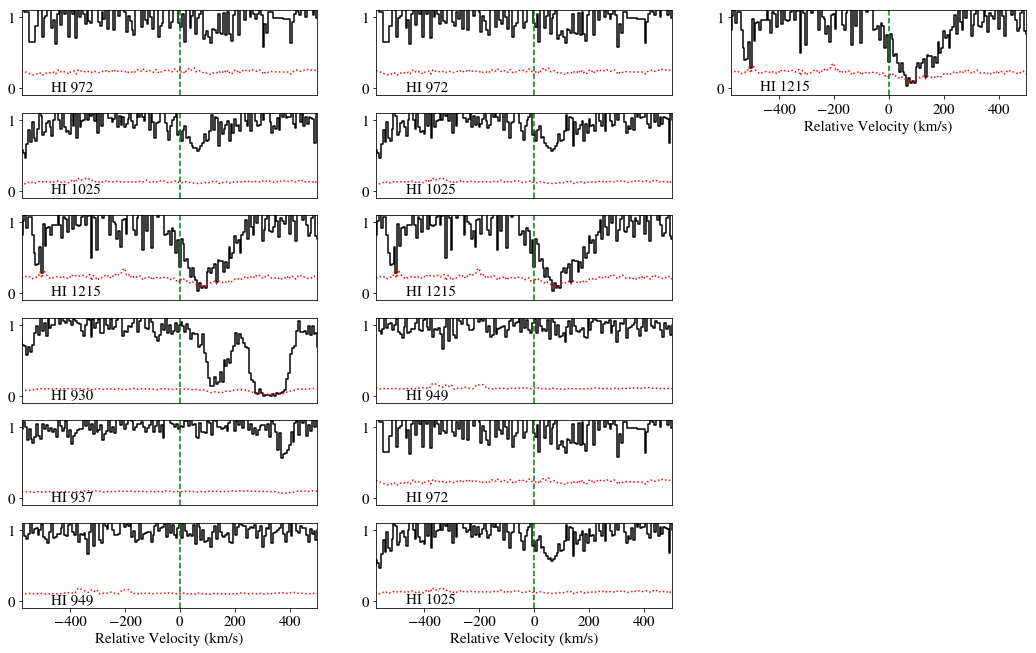

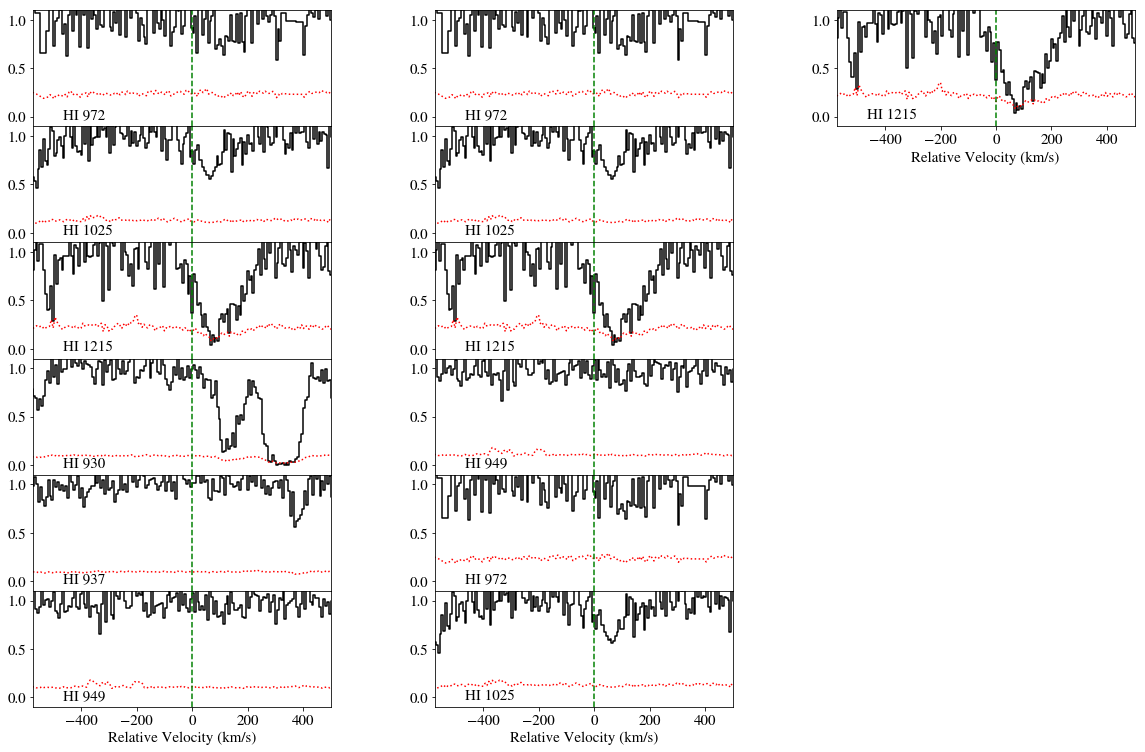

In [19]:
# attach the spec
spec_path = "/Users/mwilde/Dropbox/CGM2/J0226+0015/J0226+0015_nbin3_norm.fits"
spec = readspec(spec_path)
cgm_abs._components[0]._abslines[0].analy['spec'] = spec
cgm_abs.stack_plot(cgm_abs._components)

In [20]:
cgm_abs._components

[<AbsComponent: 02:26:14.4672 +00:15:29.772, Name=HI_z0.35043, Zion=(1,1), Ej=0 1 / cm, z=0.352715, vlim=-575.051 km / s,-439.709 km / s, logN=13.5786, sig_logN=[0.08639469 0.08639469], flag_N=1>,
 <AbsComponent: 02:26:14.4672 +00:15:29.772, Name=HI_z0.35293, Zion=(1,1), Ej=0 1 / cm, z=0.352715, vlim=-47.3484 km / s,144.529 km / s, logN=14.3901, sig_logN=[0.04454703 0.04454703], flag_N=1>,
 <AbsComponent: 02:26:14.4672 +00:15:29.772, Name=HI_z0.35355, Zion=(1,1), Ej=0 1 / cm, z=0.352715, vlim=106.809 km / s,262.709 km / s, logN=13.8658, sig_logN=[0.04954956 0.04954956], flag_N=1>]

In [21]:
spec

<XSpectrum1D: file=/Users/mwilde/Dropbox/CGM2/J0226+0015/J0226+0015_nbin3_norm.fits, nspec=1, select=0, wvmin=1154.98 Angstrom, wvmax=1795.48 Angstrom>

---------------------------------------------------------------
pyigm_igmguesses /Users/mwilde/Dropbox/CGM2/J0226+0015/J0226+0015_nbin3_norm.fits -p /Users/mwilde/Dropbox/CGM2/J0226+0015/J0226+0015_werksquad.json
z = 0.3527153
---------------------------------------------------------------
Loading abundances from Asplund2009
Abundances are relative by number on a logarithmic scale with H=12


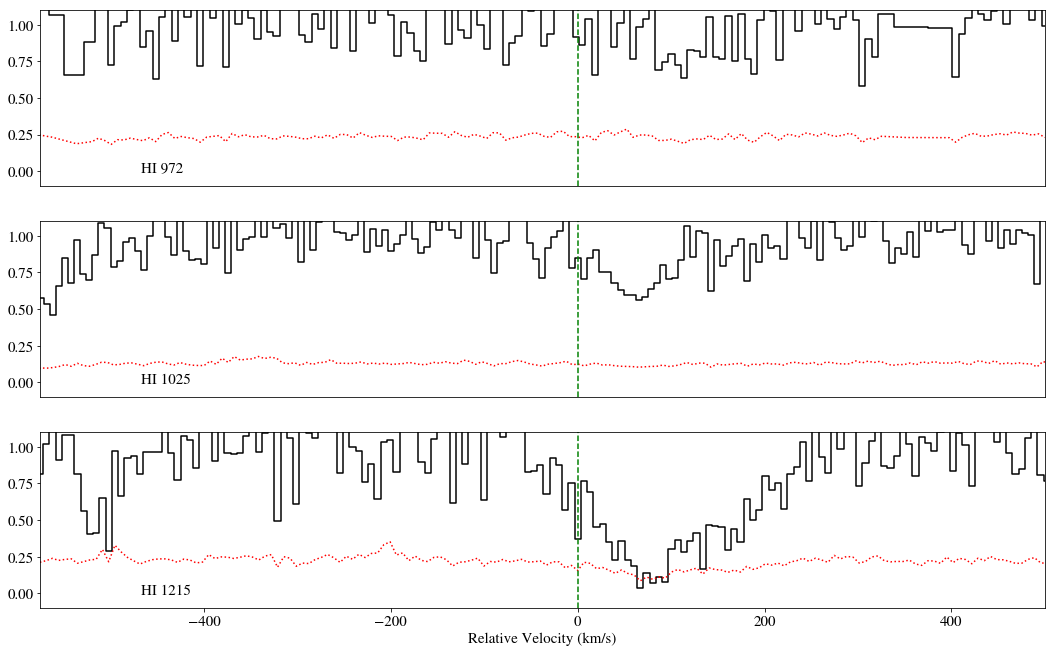

In [22]:
user = 'mwilde'

for sys in cgm_abs_list[:1]:
    xspec = sys.igm_sys._components[0]._abslines[0].analy['spec']
    
    qso = get_qsoname_from_string(xspec.filename)
    specfile = '/Users/'+user+'/Dropbox/CGM2/'+qso+'/'+qso+'_nbin3_norm.fits'
    werkfile = '/Users/'+user+'/Dropbox/CGM2/'+qso+'/'+qso+'_werksquad.json'
    igmcall = 'pyigm_igmguesses'
    
    
    print('---------------------------------------------------------------')
    print(igmcall, specfile, '-p', werkfile)
    print('z =', sys.igm_sys.zabs)
    print('---------------------------------------------------------------')
    # sys.igm_sys._components[1]._abslines
    # sys.stack_plot(sys.igm_sys._components, return_fig=True, add_missing_lines=True)
    sys.stack_plot(sys.igm_sys._components[0]._abslines, return_fig=True, add_missing_lines=True)

In [23]:
sys = cgm_survey.get_cgmsys('J1233-0031_247_12')

In [24]:
get_qsoname_from_string('J1233-0031_247_12')

'J1233-0031'

In [25]:
sys.igm_sys._components

[<AbsComponent: 12:33:03.84 -00:31:34.176, Name=HI_z0.31818, Zion=(1,1), Ej=0 1 / cm, z=0.318743, vlim=-166.804 km / s,-89.4211 km / s, logN=14.2625, sig_logN=[0.04624026 0.04624026], flag_N=1>,
 <AbsComponent: 12:33:03.84 -00:31:34.176, Name=OVI_z0.31820, Zion=(8,6), Ej=0 1 / cm, z=0.318743, vlim=-155.227 km / s,-91.6908 km / s, logN=14.0745, sig_logN=[0.05242471 0.05242471], flag_N=1>,
 <AbsComponent: 12:33:03.84 -00:31:34.176, Name=CIII_z0.31820, Zion=(6,3), Ej=0 1 / cm, z=0.318743, vlim=-150.513 km / s,-95.9372 km / s, logN=13.2458, sig_logN=[0.07340846 0.07340846], flag_N=1>,
 <AbsComponent: 12:33:03.84 -00:31:34.176, Name=HI_z0.31849, Zion=(1,1), Ej=0 1 / cm, z=0.318743, vlim=-88.3216 km / s,-26.415 km / s, logN=14.9604, sig_logN=[0.04497997 0.04497997], flag_N=1>,
 <AbsComponent: 12:33:03.84 -00:31:34.176, Name=SVI_z0.31863, Zion=(16,6), Ej=0 1 / cm, z=0.318743, vlim=-55.1322 km / s,3.51617 km / s, logN=13.0491, sig_logN=[0.11631044 0.11631044], flag_N=1>,
 <AbsComponent: 12:33:

In [26]:
sys.igm_sys._components[0]._abslines

[<AbsLine: HI 930, z=0.3182 wrest=930.7482 Angstrom, f=0.004816>,
 <AbsLine: HI 937, z=0.3182 wrest=937.8034 Angstrom, f=0.007803>,
 <AbsLine: HI 949, z=0.3182 wrest=949.7430 Angstrom, f=0.01395>,
 <AbsLine: HI 972, z=0.3182 wrest=972.5367 Angstrom, f=0.02901>,
 <AbsLine: HI 1025, z=0.3182 wrest=1025.7222 Angstrom, f=0.07914>,
 <AbsLine: HI 1215, z=0.3182 wrest=1215.6700 Angstrom, f=0.4164>]

In [27]:
sys.igm_sys._components[1]._abslines

[<AbsLine: OVI 1031, z=0.3182 wrest=1031.9261 Angstrom, f=0.1325>,
 <AbsLine: OVI 1037, z=0.3182 wrest=1037.6167 Angstrom, f=0.0658>]

In [28]:
qso = get_qsoname_from_string('J1233-0031_247_12')
specfile = '/Users/'+user+'/Dropbox/CGM2/'+qso+'/'+qso+'_nbin3_norm.fits'
sys.igm_sys._components[0]._abslines[0].analy['spec'] = specfile
spec = readspec(specfile)

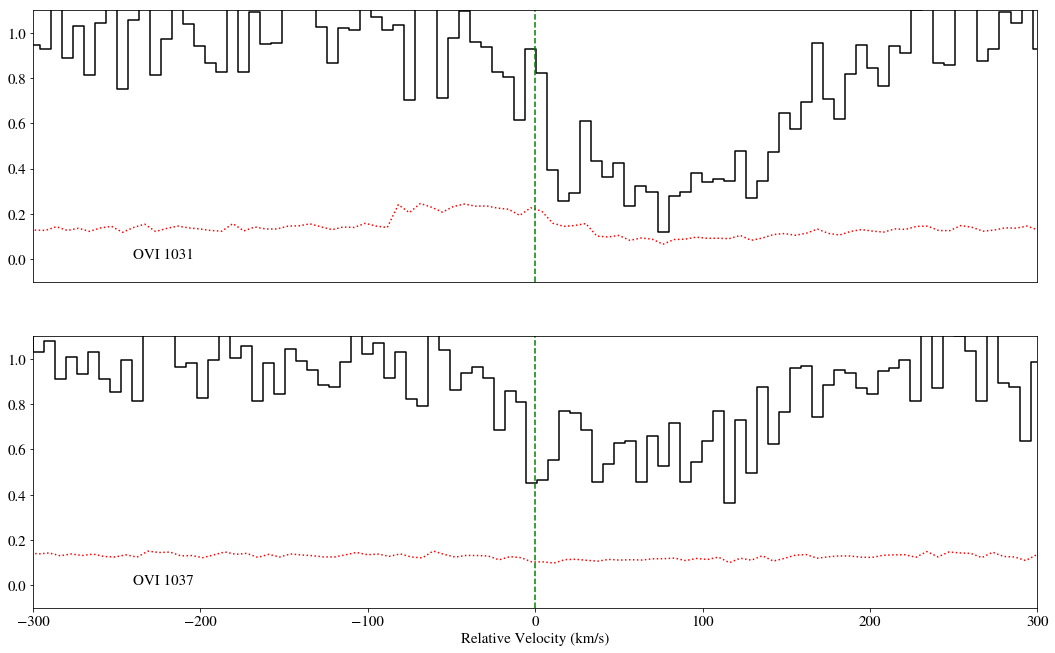

In [29]:
sys.igm_sys._components[0]._abslines[0].analy['spec']
linetools.analysis.plots.stack_plot(sys.igm_sys._components[1]._abslines)

In [30]:
sys.igm_sys.

SyntaxError: invalid syntax (<ipython-input-30-14bddf39051a>, line 1)

In [ ]:
linetools.analysis.plots.stack_plot(sys.igm_sys._components[1]._abslines, spec=spec)